[nltk_data] Downloading package stopwords to /home/ivan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


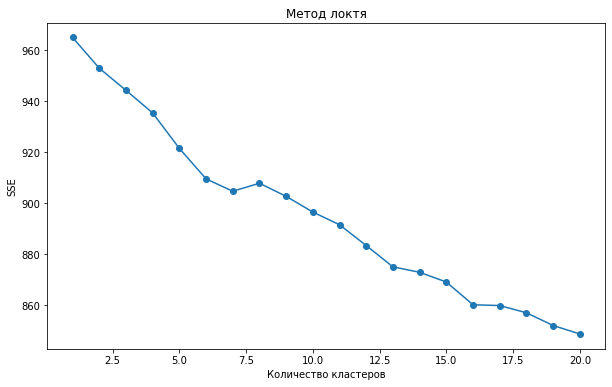

Группировка завершена. Результаты сохранены в 'grouped_manufacturers.xlsx'


In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import re
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

# Загрузка стоп-слов для русского языка
nltk.download('stopwords')
russian_stopwords = stopwords.words('russian')

# Загрузим данные из Excel файла
file_path = '/mnt/d/Doc_to_day/20240802/unique_matched_manufacturers_v_2_2 (02.2024).xlsx'
df = pd.read_excel(file_path)

# Углубленная предобработка текста
def preprocess_text(text):
    text = text.lower()  # Приведение к нижнему регистру
    text = re.sub(r'\d+', '', text)  # Удаление цифр
    text = re.sub(r'[^\w\s]', '', text)  # Удаление знаков препинания
    text = re.sub(r'\s+', ' ', text)  # Удаление лишних пробелов
    text = text.strip()  # Удаление пробелов по краям
    return text

df['Производитель МДЛП'] = df['Производитель МДЛП'].apply(preprocess_text)

# Применение TF-IDF для извлечения ключевых слов
tfidf_vectorizer = TfidfVectorizer(stop_words=russian_stopwords)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Производитель МДЛП'])

# Метод "локтя" для определения оптимального количества кластеров
def plot_elbow_method(tfidf_matrix):
    sse = []
    for k in range(1, 21):
        km = KMeans(n_clusters=k, random_state=42)
        km.fit(tfidf_matrix)
        sse.append(km.inertia_)
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 21), sse, marker='o')
    plt.xlabel('Количество кластеров')
    plt.ylabel('SSE')
    plt.title('Метод локтя')
    plt.show()

plot_elbow_method(tfidf_matrix)

# Применение K-means для кластеризации
num_clusters = 7  # Определите оптимальное количество кластеров на основе метода "локтя"
km = KMeans(n_clusters=num_clusters, random_state=42)
km.fit(tfidf_matrix)
df['Cluster'] = km.labels_

# Сохранение результатов в новый Excel файл
output_file_path = '/mnt/d/Doc_to_day/20240802/grouped_manufacturers.xlsx'
df.to_excel(output_file_path, index=False)

print("Группировка завершена. Результаты сохранены в 'grouped_manufacturers.xlsx'")


In [2]:
# Применение K-means для кластеризации
num_clusters = 7  # Определите оптимальное количество кластеров на основе метода "локтя"
km = KMeans(n_clusters=num_clusters, random_state=42)
km.fit(tfidf_matrix)
df['Cluster'] = km.labels_

# Сохранение результатов в новый Excel файл
output_file_path = '/mnt/d/Doc_to_day/20240802/grouped_manufacturers.xlsx'
df.to_excel(output_file_path, index=False)

print("Группировка завершена. Результаты сохранены в 'grouped_manufacturers.xlsx'")


Группировка завершена. Результаты сохранены в 'grouped_manufacturers.xlsx'


In [3]:
df

,Производитель МДЛП,Производитель из МС,manufacturer_id,Статус,Cluster
0,ао кемеровская фармацевтическая фабрика,NaN,NaN,Не удалось найти совпадения,0
1,оао кемеровская фармацевтическая фабрика,NaN,NaN,Не удалось найти совпадения,0
2,оао ивановская фармацевтическая фабрика,NaN,NaN,Не удалось найти совпадения,0
3,зао московская фармацевтическая фабрика,NaN,NaN,Не удалось найти совпадения,0
4,мифарм спа,NaN,NaN,Не удалось найти совпадения,2
...,...,...,...,...,...
972,ооо ропра,NaN,NaN,Не удалось найти совпадения,6
973,свисскэпс румыния срл,NaN,NaN,Не удалось найти совпадения,0
974,шилпа медикэр лтд,NaN,NaN,Не удалось найти совпадения,5
975,ooo фармапарк,NaN,NaN,Не удалось найти совпадения,0


In [5]:
df['Производитель МДЛП (очищенный)'] = df['Производитель МДЛП'].apply(preprocess_text)

# Применение TF-IDF для извлечения ключевых слов
tfidf_vectorizer = TfidfVectorizer(stop_words=russian_stopwords)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Производитель МДЛП (очищенный)'])

# Применение K-means для кластеризации с 10 кластерами
num_clusters = 10
km = KMeans(n_clusters=num_clusters, random_state=42)
km.fit(tfidf_matrix)
df['Cluster'] = km.labels_

# Нумерация и выделение объединяющего слова для каждой позиции
df['Cluster Number'] = df['Cluster'] + 1
df['Cluster Key'] = df.groupby('Cluster')['Производитель МДЛП (очищенный)'].transform(lambda x: x.mode()[0])

# Сохранение результатов в новый Excel файл
output_file_path = '/mnt/d/Doc_to_day/20240802/grouped_manufacturers_with_original.xlsx'
df.to_excel(output_file_path, index=False)

print("Группировка завершена. Результаты сохранены в 'grouped_manufacturers_with_original.xlsx'")

Группировка завершена. Результаты сохранены в 'grouped_manufacturers_with_original.xlsx'


In [18]:
import pandas as pd
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Загрузка стоп-слов для русского языка
nltk.download('stopwords')
russian_stopwords = set(stopwords.words('russian'))

# Загрузим данные из Excel файла
file_path = '/mnt/d/Doc_to_day/20240802/unique_matched_manufacturers_v_2_2 (02.2024).xlsx'
df = pd.read_excel(file_path)

# Предобработка текста
def preprocess_text(text):
    # Удаление юридических форм
    text = re.sub(r'\b(ао|оао|зао|пао|ооо|ип|гуп|кфх|спа|с\.п\.а|са|с\.а|гмбх|б\.в)\b', '', text, flags=re.IGNORECASE)
    text = text.lower()  # Приведение к нижнему регистру
    text = re.sub(r'\d+', '', text)  # Удаление цифр
    text = re.sub(r'[^\w\s]', '', text)  # Удаление знаков препинания
    text = re.sub(r'\s+', ' ', text)  # Удаление лишних пробелов
    text = text.strip()  # Удаление пробелов по краям
    return text

# Применение предобработки
df['Производитель МДЛП (очищенный)'] = df['Производитель МДЛП'].apply(preprocess_text)

# Разбивка текста на слова и подсчет частоты
all_words = ' '.join(df['Производитель МДЛП (очищенный)']).split()
filtered_words = [word for word in all_words if word not in russian_stopwords]
word_counts = Counter(filtered_words)

# Вывод наиболее часто повторяющихся слов
most_common_words = word_counts.most_common(1500)
filtered_common_words = [(word, freq) for word, freq in most_common_words if freq > 2]

for word, freq in filtered_common_words:
    print(f"{word}: {freq}")

# Пример вывода для наглядности
output_file_path = '/mnt/d/Doc_to_day/20240802/common_words.xlsx'
common_words_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])
common_words_df.to_excel(output_file_path, index=False)

лтд: 166
фарма: 84
фармасьютикал: 70
ко: 60
инк: 35
пвт: 30
срл: 24
ллс: 22
завод: 20
кг: 18
аг: 16
фармацевтическая: 15
ве: 15
аш: 14
энд: 14
фарм: 14
илач: 13
каталент: 12
сервисез: 12
компания: 11
фирма: 11
санайи: 11
патеон: 11
сл: 10
институт: 10
фамар: 10
бакстер: 10
гбуз: 9
крови: 9
фармацевтический: 9
ас: 9
лабораторис: 9
фармасьютикалз: 9
фабрика: 8
тиджарет: 8
областная: 8
станция: 8
переливания: 8
фгбу: 8
арцнаймиттель: 8
фрезениус: 8
лабораториос: 8
делфарм: 7
лаборатории: 7
дельфарм: 7
компани: 7
фармацойтише: 7
каби: 7
лаборатория: 7
корпорейшн: 6
индастриз: 6
м: 6
хелс: 6
медикал: 6
фарева: 6
ад: 6
лабораториз: 6
центр: 5
сан: 5
роспотребнадзора: 5
эббви: 5
зентива: 5
мерк: 5
российский: 5
нпк: 5
препаратов: 5
хаупт: 5
фгуп: 5
предприятие: 5
др: 5
фабрик: 5
аб: 5
россии: 5
фармасьютикалс: 5
продакшн: 4
ao: 4
лек: 4
дойчланд: 4
российской: 4
шарп: 4
ферринг: 4
п: 4
гск: 4
консьюмер: 4
менуфекчуринг: 4
холдинг: 4
зигфрид: 4
сенекси: 4
корден: 4
польфа: 4
лилли: 4
ресифарм:

[nltk_data] Downloading package stopwords to /home/ivan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
import pandas as pd
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Загрузка стоп-слов для русского языка
nltk.download('stopwords')
russian_stopwords = set(stopwords.words('russian'))

# Загрузим данные из Excel файла с производителями
file_path = '/mnt/d/Doc_to_day/20240802/unique_matched_manufacturers_v_2_2 (02.2024).xlsx'
df = pd.read_excel(file_path)

# Загрузим список часто повторяющихся слов
common_words_path = '/mnt/d/Doc_to_day/20240802/common_words.xlsx'
common_words_df = pd.read_excel(common_words_path)

# Фильтрация слов, которые встречаются 3 и более раз
common_words_filtered = common_words_df[common_words_df['Frequency'] >= 3]['Word'].tolist()

# Предобработка текста
def preprocess_text(text):
    # Удаление юридических форм
    text = re.sub(r'\b(ао|оао|зао|пао|ооо|ип|гуп|кфх|спа|с\.п\.а|са|с\.а|гмбх|нпп|сл|гбуз|б\.в)\b', '', text, flags=re.IGNORECASE)
    text = text.lower()  # Приведение к нижнему регистру
    text = re.sub(r'\d+', '', text)  # Удаление цифр
    text = re.sub(r'[^\w\s-]', '', text)  # Удаление знаков препинания, кроме "-"
    text = re.sub(r'\s+', ' ', text)  # Удаление лишних пробелов
    text = text.strip()  # Удаление пробелов по краям
    return text

df['Производитель МДЛП (очищенный)'] = df['Производитель МДЛП'].apply(preprocess_text)

# Функция для удаления часто повторяющихся слов с учетом условий
def remove_common_words(text, common_words):
    words = text.split()
    if len(words) > 2:
        words = [word for word in words if word not in common_words]
    return ' '.join(words)

df['Производитель МДЛП (без частых слов)'] = df['Производитель МДЛП (очищенный)'].apply(lambda x: remove_common_words(x, common_words_filtered))

# Сохранение результатов в новый Excel файл
output_file_path = '/mnt/d/Doc_to_day/20240802/filtered_manufacturers.xlsx'
df.to_excel(output_file_path, index=False)

print("Фильтрация завершена. Результаты сохранены в 'filtered_manufacturers.xlsx'")

Фильтрация завершена. Результаты сохранены в 'filtered_manufacturers.xlsx'


[nltk_data] Downloading package stopwords to /home/ivan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
import pandas as pd

# Загрузим данные из файла filtered_manufacturers.xlsx
file_path = '/mnt/d/Doc_to_day/20240802/filtered_manufacturers.xlsx'
df = pd.read_excel(file_path)

# Функция для выделения ключевого слова
def get_key_word(text):
    words = text.split()
    if len(words) > 1:
        return words[-1]  # Берем последнее слово в названии как ключевое
    return words[0]

# Применяем функцию для получения ключевого слова
df['Key Word'] = df['Производитель МДЛП (очищенный)'].apply(get_key_word)

# Группируем данные по ключевому слову
grouped = df.groupby('Key Word').filter(lambda x: len(x) > 1)

# Сохранение результатов в новый Excel файл
output_file_path = '/mnt/d/Doc_to_day/grouped_manufacturers_by_key_word.xlsx'
grouped.to_excel(output_file_path, index=False)

print("Группировка завершена. Результаты сохранены в 'grouped_manufacturers_by_key_word.xlsx'")

Группировка завершена. Результаты сохранены в 'grouped_manufacturers_by_key_word.xlsx'


In [29]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

# Загрузка стоп-слов для русского языка
nltk.download('stopwords')
russian_stopwords = set(stopwords.words('russian'))

# Загрузим данные из файла filtered_manufacturers.xlsx
file_path = '/mnt/d/Doc_to_day/20240802/filtered_manufacturers.xlsx'
df = pd.read_excel(file_path)

# Предобработка текста
def preprocess_text(text):
    text = re.sub(r'\b(ао|оао|зао|пао|ооо|ип|гуп|кфх|спа|с\.п\.а|са|с\.а|гмбх|нпп|сл|гбуз|б\.в)\b', '', text, flags=re.IGNORECASE)
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s-]', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text

df['Производитель МДЛП (очищенный)'] = df['Производитель МДЛП'].apply(preprocess_text)

df['Key Word'] = df['Производитель МДЛП (очищенный)'].apply(get_key_word)

# Определение схожих ключевых слов с использованием fuzzywuzzy
def find_similar_groups(words, threshold=80):
    groups = {}
    for word in words:
        found = False
        for key in groups.keys():
            if fuzz.ratio(word, key) >= threshold:
                groups[key].append(word)
                found = True
                break
        if not found:
            groups[word] = [word]
    return groups

key_words = df['Key Word'].unique()
similar_groups = find_similar_groups(key_words)

# Создание столбца для групп
df['Group'] = ''

# Обновление DataFrame с учетом групп
for group, members in similar_groups.items():
    if len(members) > 1:
        for member in members:
            df.loc[df['Key Word'] == member, 'Group'] = group

# Сохранение результатов в новый Excel файл
output_file_path = '/mnt/d/Doc_to_day/20240802/grouped_manufacturers_by_key_word.xlsx'
df.to_excel(output_file_path, index=False)

print("Группировка завершена. Результаты сохранены в 'grouped_manufacturers_by_key_word.xlsx'")


[nltk_data] Downloading package stopwords to /home/ivan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Группировка завершена. Результаты сохранены в 'grouped_manufacturers_by_key_word.xlsx'


In [35]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

# Загрузка стоп-слов для русского языка
nltk.download('stopwords')
russian_stopwords = set(stopwords.words('russian'))

# Загрузим данные из исходного файла
file_path = '/mnt/d/Doc_to_day/20240802/unique_matched_manufacturers_v_2_2 (02.2024).xlsx'
df = pd.read_excel(file_path)

# Предобработка текста
def preprocess_text(text):
    text = re.sub(r'\b(ао|оао|зао|пао|ооо|ип|гуп|фарма|фармасьютикал|лтд|фарма|фармасьютикал|ко|инк|пвт|срл|ллс|завод|кг|аг|фармацевтическая|ве|аш|энд|фарм|илач|каталент|сервисез|компания|фирма|санайи|патеон|сл|институт|фамар|бакстер|гбуз|крови|фармацевтический|ас|лабораторис|фармасьютикалз|фабрика|тиджарет|областная|станция|переливания|фгбу|арцнаймиттель|фрезениус|лабораториос|делфарм|лаборатории|дельфарм|компани|фармацойтише|каби|лаборатория|корпорейшн|индастриз|м|хелс|медикал|фарева|ад|лабораториз|центр|сан|роспотребнадзора|эббви|зентива|мерк|российский|нпк|препаратов|хаупт|фгуп|предприятие|др|фабрик|аб|россии|фармасьютикалс|продакшн|ao|лек|дойчланд|российской|шарп|ферринг|п|гск|консьюмер|менуфекчуринг|холдинг|зигфрид|сенекси|корден|польфа|лилли|ресифарм|франс|лабс|нортон|продактс|эйсай|сп|минздрава|биофарма|нии|фмба|лаборатуар|тоо|вайет|прайвет|ко|кфх|спа|с\.п\.а|са|с\.а|гмбх|нпп|сл|гбуз|б\.в)\b', '', text, flags=re.IGNORECASE)
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', ' ', text)  # Удаление всех знаков препинания, замена их на пробел
    text = re.sub(r'\s+', ' ', text)  # Удаление лишних пробелов
    text = text.strip()  # Удаление пробелов по краям
    return text

df['Производитель МДЛП (очищенный)'] = df['Производитель МДЛП'].apply(preprocess_text)

# Функция для нахождения схожих групп
def find_similar_groups(names, threshold=90):
    groups = {}
    for name in names:
        found = False
        for key in groups.keys():
            if fuzz.token_sort_ratio(name, key) >= threshold:
                groups[key].append(name)
                found = True
                break
        if not found:
            groups[name] = [name]
    return groups

# Поиск схожих групп
names = df['Производитель МДЛП (очищенный)'].unique()
similar_groups = find_similar_groups(names)

# Создание столбца для групп
df['Group'] = ''

# Обновление DataFrame с учетом групп
for group, members in similar_groups.items():
    if len(members) > 1:
        for member in members:
            df.loc[df['Производитель МДЛП (очищенный)'] == member, 'Group'] = group

# Сохранение результатов в новый Excel файл
output_file_path = '/mnt/d/Doc_to_day/20240802/grouped_manufacturers_by_key_word.xlsx'
df.to_excel(output_file_path, index=False)

print("Группировка завершена. Результаты сохранены в 'grouped_manufacturers_by_key_word.xlsx'")


[nltk_data] Downloading package stopwords to /home/ivan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Группировка завершена. Результаты сохранены в 'grouped_manufacturers_by_key_word.xlsx'


In [38]:
# Найдем дубликаты и создадим группы
group_counter = 1
groups = {}
for idx, row in df.iterrows():
    name = row['Производитель МДЛП (очищенный)']
    if name not in groups:
        duplicates = df[df['Производитель МДЛП (очищенный)'] == name]
        if len(duplicates) > 1:
            df.loc[duplicates.index, 'Group'] = group_counter
            group_counter += 1

# Сохранение результатов в новый Excel файл
output_file_path = '/mnt/d/Doc_to_day/20240802/grouped_manufacturers_by_key_word.xlsx'
df.to_excel(output_file_path, index=False)

print("Группировка завершена. Результаты сохранены в 'grouped_manufacturers_by_key_word.xlsx'")

Группировка завершена. Результаты сохранены в 'grouped_manufacturers_by_key_word.xlsx'
